In [30]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as mat

# Objective
Data Visualization Let's practice what we have learned so far and visualize some data!

In order to validate this checkpoint you must accomplish the following tasks:

Preprocessing phase: After importing the dataset using Pandas start by showing the head of the dataset then some general information about the data columns and values.

As a next step, apply what you have learned in the course to preprocess your data: find missing information and replace it with the appropriate values.

Verify that your data is ready to be treated.

Visualization phase:
Start by studying the distribution of the most important features based on your understanding of the dataset and the problem.

Visualize the correlation between Sex and Age in a plot of your choosing. The visualized plot should give us obvious deductions concerning the importance of age and sex in the survival of the individuals.

Pick two other features and study their impact on the survival of the individuals.

Have a look at this function:

def plot_correlation_map( df ):

corr = df.corr()

s , ax = plt.subplots( figsize =( 12 , 10 ) )

cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

s = sns.heatmap(

    corr, 

    cmap = cmap,

    square=True, 

    cbar_kws={ 'shrink' : .9 }, 

    ax=ax, 

    annot = True, 

    annot_kws = { 'fontsize' : 12 }

    )
Try running the function, analyze what it does exactly and its utilities. Write a paragraph describing your analysis (the paragraph should be in English).

Use the groupby function combined with the mean() to view the relation between Pclass and survived

As a final step, try to drop the useless columns (such as Names).

We dropped the column Names because we evaluated it to be useless. But that's ultimately not the case because we can create a very useful feature from Names.

Your task now is to create a new column called Title which contains the appropriate Title for each individual. Hint: Extract the title from the column Names.

Visualize the correlation between Title and other features(e.g Sex, Fare, Age).

As you have seen, there are a lot of titles which makes the feature very impractical. Let's try to group these titles into more useful ones.

Hint: Use the following dictionary

Title_Dictionary = {

                "Capt":       "Officer",

                "Col":        "Officer",

                "Major":      "Officer",

                  "Dr":         "Officer",

                "Rev":        "Officer”,

                "Jonkheer":   "Royalty",

                "Don":        "Royalty",

                "Sir" :       "Royalty",

               "Lady" :      "Royalty"

              "the Countess": "Royalty",

                "Dona":       "Royalty”,

                "Mme":        "Miss",

                "Mlle":       "Miss",

                "Miss" :      "Miss",

                "Ms":         "Mrs",

                "Mr" :        "Mrs",

                "Mrs" :       "Mrs

                "Master" :    "Master"

                }
Let's visualize the same correlations using these new titles now.

Finally, use the Parch and the SibSp columns to create a more useful feature, let's call it FamilySize.

Use what you have learned so far to conclude if this feature is useful or not.

In [31]:
titanic_2 = pd.read_csv("C:\\Users\\23481\\Downloads\\titanic (2).csv")

In [32]:
titanic_2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [33]:
titanic_2.head() #to show the first five rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [34]:
titanic_2.info() #to get the general information in the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [35]:
titanic_2.isnull().sum() #to call out the column with missing numbers

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [36]:
titanic_2['Age'].fillna(titanic_2['Age'].median(),inplace=True) # to replace the missing numbers in age.

In [37]:
titanic_2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [38]:
titanic_2['Cabin'].fillna('C85',inplace=True) #to replace the missing numbers in cabin

In [39]:
titanic_2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C85,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C85,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C85,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,C85,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,C85,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [40]:
titanic_2.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [41]:
titanic_2['Embarked'].fillna('S',inplace=True)

In [42]:
titanic_2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C85,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C85,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C85,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,C85,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,C85,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [43]:
titanic_2.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [44]:
titanic_2['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [45]:
titanic_2['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

<AxesSubplot:title={'center':'bar plot of Age'}, xlabel='Age', ylabel='Frequency'>

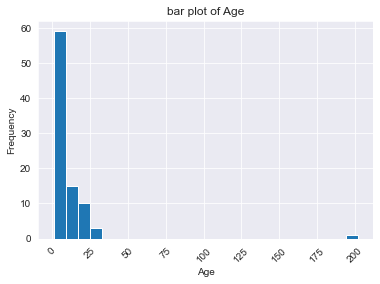

In [46]:
mat.xlabel('Age')
mat.ylabel('Age count')
mat.title('bar plot of Age')
vc = titanic_2['Age'].value_counts()
vc.plot.hist(rot=45, bins = 25)

<AxesSubplot:title={'center':'bar plot of Sex'}, xlabel='Sex', ylabel='Sex count'>

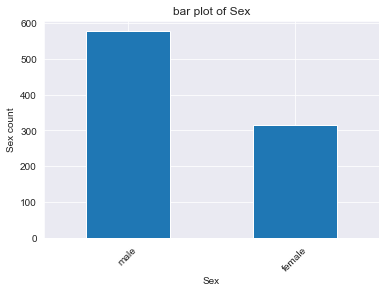

In [47]:
mat.xlabel('Sex')
mat.ylabel('Sex count')
mat.title('bar plot of Sex')
vc = titanic_2['Sex'].value_counts()
vc.plot.bar(rot=45)

<AxesSubplot:title={'center':'bar plot of Pclass'}, xlabel='Pclass', ylabel='Pclass count'>

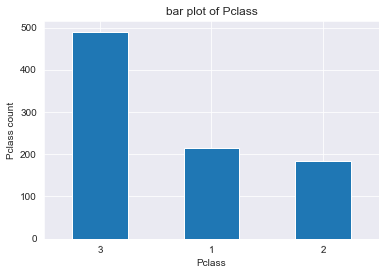

In [48]:
mat.xlabel('Pclass')
mat.ylabel('Pclass count')
mat.title('bar plot of Pclass')
vc = titanic_2['Pclass'].value_counts()
vc.plot.bar(rot=2)

<AxesSubplot:title={'center':'pie plot of Pclass'}, xlabel='Pclass', ylabel='Pclass'>

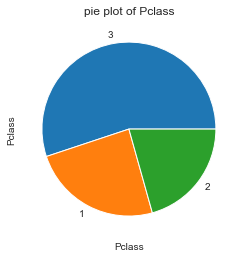

In [49]:
mat.xlabel('Pclass')
mat.ylabel('Pclass count')
mat.title('pie plot of Pclass')
vc = titanic_2['Pclass'].value_counts()
vc.plot.pie(rot=2)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87]),
 [Text(0, 0, '0.42'),
  Text(1, 0, '0.67'),
  Text(2, 0, '0.75'),
  Text(3, 0, '0.83'),
  Text(4, 0, '0.92'),
  Text(5, 0, '1.0'),
  Text(6, 0, '2.0'),
  Text(7, 0, '3.0'),
  Text(8, 0, '4.0'),
  Text(9, 0, '5.0'),
  Text(10, 0, '6.0'),
  Text(11, 0, '7.0'),
  Text(12, 0, '8.0'),
  Text(13, 0, '9.0'),
  Text(14, 0, '10.0'),
  Text(15, 0, '11.0'),
  Text(16, 0, '12.0'),
  Text(17, 0, '13.0'),
  Text(18, 0, '14.0'),
  Text(19, 0, '14.5'),
  Text(20, 0, '15.0'),
  Text(21, 0, '16.0'),
  Text(22, 0, '17.0'),
  Text(23, 0, '18.0'),
  Text(24, 0, '19.0'),
  Text(25, 0, '20.0'),
  Text(26, 0, '20.5

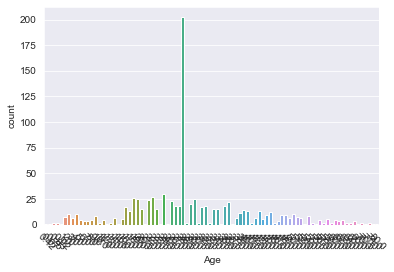

In [50]:
sb.countplot(x='Age', data=titanic_2)
mat.xticks(rotation = -45)

<AxesSubplot:xlabel='Age', ylabel='Count'>

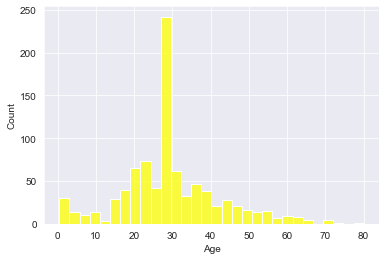

In [51]:
sb.histplot(data=titanic_2, x= 'Age',bins = 'auto',color = 'yellow')

<AxesSubplot:xlabel='Sex', ylabel='count'>

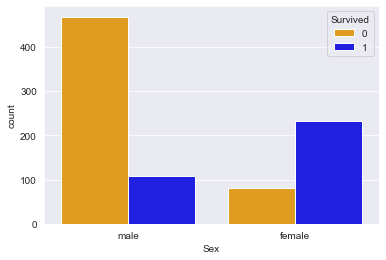

In [52]:
sb.countplot(data = titanic_2, x = 'Sex', palette = ['orange', 'blue'], hue = "Survived")

C:\Users\23481\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\23481\anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


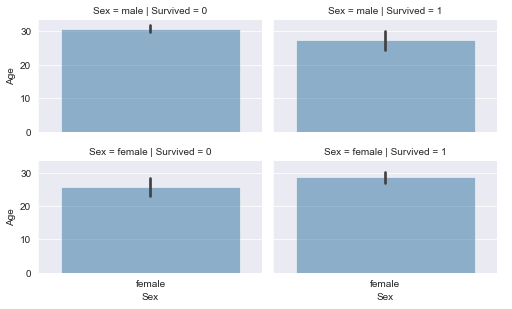

In [53]:
grid = sb.FacetGrid(titanic_2, row="Sex", col="Survived", size=2.2, aspect=1.6)
grid.map(sb.barplot, "Sex", 'Age', alpha=.5,)
grid.add_legend()

C:\Users\23481\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\23481\anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


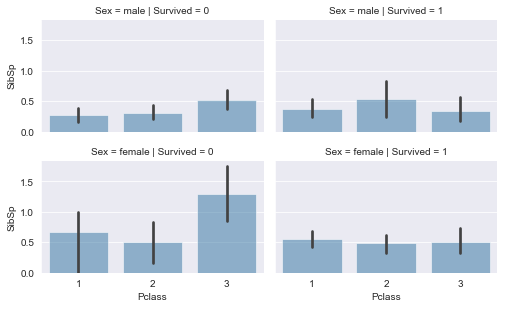

In [54]:
grid_2 = sb.FacetGrid(titanic_2, row="Sex", col="Survived", size=2.2, aspect=1.6)
grid_2.map(sb.barplot, "Pclass", 'SibSp', alpha=.5)
grid_2.add_legend()

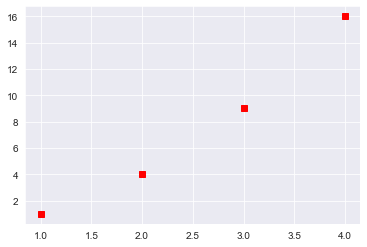

In [55]:
mat.plot([1,2,3,4],[1,4,9,16],'rs')
mat.show()

<AxesSubplot:ylabel='Age'>

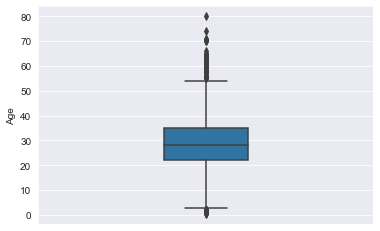

In [56]:
sb.set_style('darkgrid') #sb.boxplot(titanic_2['age'],width = 0.5)
sb.boxplot(y = 'Age', data = titanic_2, width = 0.25)

In [60]:
def plot_correlation_map( df ):
    
    corr = df.corr()

    s , ax = mat.subplots( figsize =( 12 , 10 ) )

    cmap = sb.diverging_palette( 220 , 10 , as_cmap = True )

    s = sb.heatmap(corr, cmap = cmap, square=True, cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 })

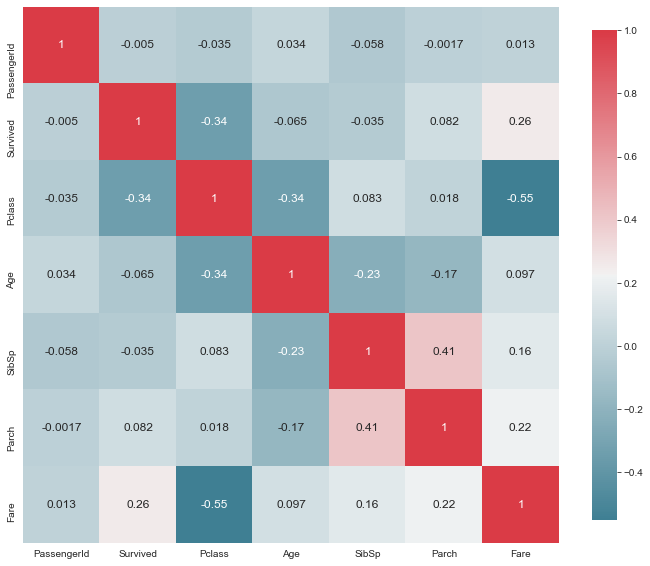

In [61]:
plot_correlation_map(titanic_2)

   The chart above is a correlation chart showing the relationship between each column in the dataframe.
for example, to show the relationship between the column 'survived' and the other columns,
this chart shows that 'parch' and 'fare' are both positive correlation as their value is closer to 1, 
and so, their rate of survival based on these column is very high. however, on the other side, 'age', 'sibsp', 'pclass', 'and 'passengerid' 
all correlate negatively as their value falls below 1. this is to show that their rate of surviving based on these column
is very low, and so leading to their death. 

In [62]:
titanic_2.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.034212,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500
Age,0.034212,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688
SibSp,-0.057527,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000


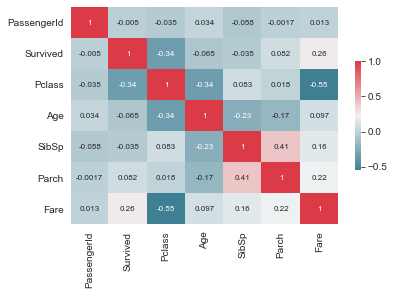

In [64]:
s=sb.heatmap(titanic_2.corr(),
             cmap=sb.diverging_palette(220,10,as_cmap=True),
             square=False,
             cbar_kws={'shrink':.5},
             #ax = mat.subplot(figsize=(12,10)),
             annot=True,
             annot_kws={'fontsize':8})
# s, ax=mat.subplot(figsize = (12,10))
# mat.figure
#[p==  (figsize =(20,40))

In [65]:
t= titanic_2.groupby(['Survived','Pclass']).agg(total=('Survived','count'))

In [66]:
t

total
Survived Pclass       
0        1          80
         2          97
         3         372
1        1         136
         2          87
         3         119

In [67]:
lis1=['{:,.2%}'.format(r/t['total'][:3].sum()) for r in t['total'][:3]]
lis1

['14.57%', '17.67%', '67.76%']

In [68]:
lis2=['{:,.2%}'.format(r/t['total'][3:].sum()) for r in t['total'][3:]]
lis2

['39.77%', '25.44%', '34.80%']

In [69]:
lis1.extend(lis2)
lis1

['14.57%', '17.67%', '67.76%', '39.77%', '25.44%', '34.80%']

In [70]:
t['proportion'] = lis1

t

total proportion
Survived Pclass                  
0        1          80     14.57%
         2          97     17.67%
         3         372     67.76%
1        1         136     39.77%
         2          87     25.44%
         3         119     34.80%

In [75]:
titanic_2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C85,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C85,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C85,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,C85,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,C85,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [76]:
T_dic = {

            "Capt":       "Officer",

            "Col":        "Officer",

            "Major":      "Officer",

              "Dr":         "Officer",

            "Rev":        "Officer",

            "Jonkheer":   "Royalty",

            "Don":        "Royalty",

            "Sir" :       "Royalty",

           "Lady" :      "Royalty",

          "the Countess": "Royalty",

            "Dona":       "Royalty",

            "Mme":        "Miss",

            "Mlle":       "Miss",

            "Miss" :      "Miss",

            "Ms":         "Mrs",

            "Mr" :        "Mrs",

            "Mrs" :       "Mrs",

            "Master" :    "Master"

            }

In [77]:
T_dic.keys()

dict_keys(['Capt', 'Col', 'Major', 'Dr', 'Rev', 'Jonkheer', 'Don', 'Sir', 'Lady', 'the Countess', 'Dona', 'Mme', 'Mlle', 'Miss', 'Ms', 'Mr', 'Mrs', 'Master'])

In [78]:
T_dic.values()

dict_values(['Officer', 'Officer', 'Officer', 'Officer', 'Officer', 'Royalty', 'Royalty', 'Royalty', 'Royalty', 'Royalty', 'Royalty', 'Miss', 'Miss', 'Miss', 'Mrs', 'Mrs', 'Mrs', 'Master'])

In [79]:
old_title = []
new_title = []

for name in titanic_2['Name']:
    for t,u in zip(T_dic.keys(),T_dic.values()):
        t = t +'.'
        if t in name:
            old_title.append(t)
            new_title.append(u)

In [80]:
len(old_title)==len(titanic_2)

True

In [81]:
titanic_2['old_title'] = old_title
titanic_2['new_title'] = new_title

In [82]:
titanic_2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,old_title,new_title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C85,S,Mr.,Mrs
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C85,S,Miss.,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C85,S,Mr.,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,C85,S,Rev.,Officer
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss.,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,C85,S,Miss.,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr.,Mrs


In [83]:
titanic_2['Familysize'] = titanic_2['SibSp'] + titanic_2['Parch']

In [84]:
titanic_2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,old_title,new_title,Familysize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C85,S,Mr.,Mrs,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.,Mrs,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C85,S,Miss.,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.,Mrs,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C85,S,Mr.,Mrs,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,C85,S,Rev.,Officer,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss.,Miss,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,C85,S,Miss.,Miss,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr.,Mrs,0


<AxesSubplot:xlabel='new_title', ylabel='count'>

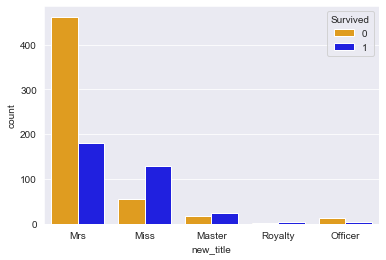

In [85]:
sb.countplot(data = titanic_2, x = 'new_title', palette = ['orange', 'blue'], hue = "Survived")

In [86]:
titanic_3 = titanic_2.drop(columns = ['PassengerId','Pclass'])

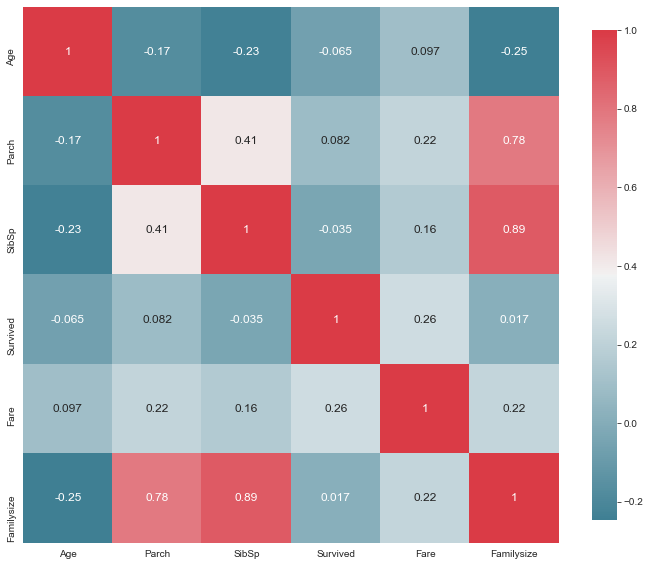

In [87]:
plot_correlation_map(titanic_3[['Age','Parch','SibSp','Survived','Fare','Familysize']])

In [88]:
titanic_3

,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,old_title,new_title,Familysize
0,0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C85,S,Mr.,Mrs,1
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.,Mrs,1
2,1,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C85,S,Miss.,Miss,0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.,Mrs,1
4,0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C85,S,Mr.,Mrs,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,C85,S,Rev.,Officer,0
887,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss.,Miss,0
888,0,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,C85,S,Miss.,Miss,3
889,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr.,Mrs,0


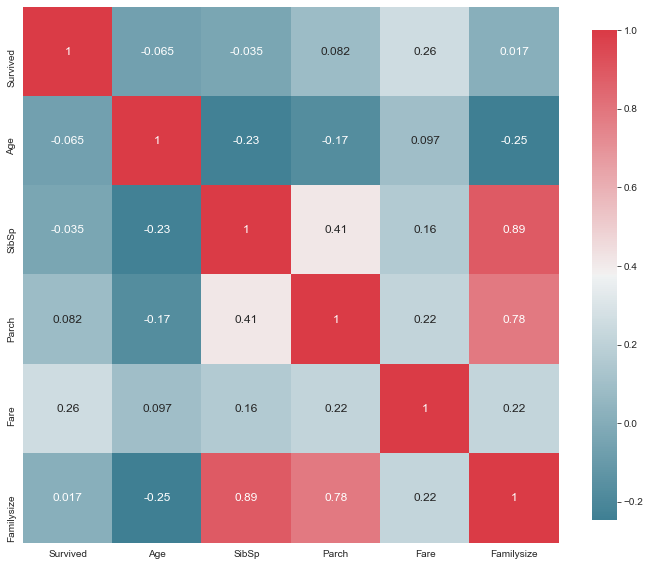

In [89]:
plot_correlation_map(titanic_3)

The chart above is a correlation chart showing the relationship between each column in the dataframe, i.e, 
the effect a column has on another column. For example, from the above chart, to view the relationship between the column 
'survived' and the other columns, we can conclude that 'parch','familysize' and 'fare' are both positive correlation 
as their value is closer to 1, and so, their rate of survival based on these column is very high. 
However, on the other hand, 'age', and 'sibsp', correlate negatively 
as their value falls below 1. this is to show that their rate of surviving
based on these column is very low, and so leading to their death.